# IT41 Practical Session #3  - Starting with MPQP

---



In this practical session you will learn how to do and run your first quantum computation with MPQP

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/mpqp.png'  width="440px" />  
        <img src='img/colibri.png'  width="250px" />  
    </tr>
</table>

MPQP is an open-source framework for quantum computing​ based on Python and developped by the French start-up company ColibriTD (https://www.colibritd.com/). It allows to generate quantum circuits, run them on quantum simulators and/or on quantum computers for different provides (IBM, Azure, AWS, IonQ's, etc..).

All docs and info regarding the MPQP library can be found here: https://mpqpdoc.colibri-quantum.com/


---

## Import MPQP, the gates and the measurement tools

To run a quantum algorithm in the circuit formalism one needs to create a cricuit, to place gates and choose  measuement option. 
To do so, one first need to import the following libraries


   

In [116]:
from mpqp import *
from mpqp.gates import *
from mpqp.measures import BasisMeasure

A quantum computation is often presented in the circuit formalism

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/circuit.png'  width="440px" />    
    </tr>
</table>



### Create a circuit
Thus the first thing to do is to create a circuit that will be made of quatum register (the wires that manipulates qubits) and classical registers (the wire where the values of the measurement will be recorded).

To create a circuit we will call the function QCircuit and specify the number of qubits $n$ one wants to use (here let's start with $n=1$):


In [117]:
circuit = QCircuit(1)

### Vizualisation

To see our circuit one can use the following command:


In [118]:
print(circuit)

   
q: 
   


### Adding gates

Quantum operations are implemented by quantum gates, i.e. unitary matrices acting on the quantum state. Here are a couple of quantum gates implemented in MPQP: The Hadamard matrix, the NOT gate, the Z-gate

$$H=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix},
X=\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}, Z=\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
$$

To add a Hadamard gate to the circuit we can use the command:

```Python
circuit.add(H(0))
```
Note that the $H(0)$ indicates to which quantum register, the gate will be added to.
You can visualize the result by using again

```Python
print(circuit)
```

In [119]:
circuit.add(H(0))

In [120]:
print(circuit)

   ┌───┐
q: ┤ H ├
   └───┘


### Adding Measure operators

Once we have done as many operation on our circuit one can apply measurement operators. This is achieved by the command
```Python
circuit.add(BasisMEasure())
```

In the BasisMeasure command one can specify the qubit to be measured, the basis (standartd by default), the number of shots...

In [121]:
circuit.add(BasisMeasure())

## Run the circuit

Once your circuit is properly generated you can run it on your own computer using a quantum simulator or on a real quantum device. The MPQP allows one to not only address different types of simulator but also different real hardware backend. One shows here some very simple possibilities offered by the multiplaform approach of MPQP 

First let's load the execution library


In [122]:
from mpqp.execution import *

### Run on AerSimulator (Qiskit Simulator) or Cirq (Google simulator)

The command to run a curcuit is 
```Python 
run() 
```

The command takes as entry the circuit to execute and the backend.

If one wants to run AerSimulator the local simulator of IBM or Cirq for Google, the sequence is

```Python
run(circuit,IBMDevice.AER_SIMULATOR)
```

Or


```Python
run(circuit,GOOGLEDevice.CIRQ_LOCAL_SIMULATOR)
```

It is also possible to use simulators that are desgined to respond with similar amount of error of the real backend. For instance to use the "Fake Brisbane' quantum computer one can run:

```Python
from mpqp.execution.simulated_devices import*
result=run(circuit,IBMSimulatedDevice.FakeBrisbane)
```

It is then possible to run on different devices at once:

```Python
run(circuit,[IBMDevice.AER_SIMULATOR,GOOGLEDevice.CIRQ_LOCAL_SIMULATOR,IBMSimulatedDevice.FakeBrisbane])
```

In [123]:
from mpqp.execution.simulated_devices import *

In [124]:
#result1 = run(circuit, GOOGLEDevice.CIRQ_LOCAL_SIMULATOR) ## qsimcirq is not compatible on my machine

In [125]:
#print(result1)

In [126]:
result2 = run(circuit, IBMSimulatedDevice.FakeBrisbane)

In [127]:
print(result2)

Result: IBMSimulatedDevice, FakeBrisbane
  Counts: [522, 502]
  Probabilities: [0.50977, 0.49023]
  Samples:
    State: 0, Index: 0, Count: 522, Probability: 0.5097656
    State: 1, Index: 1, Count: 502, Probability: 0.4902344
  Error: None


In [128]:
result3 = run(circuit, [IBMDevice.AER_SIMULATOR, IBMSimulatedDevice.FakeBrisbane])

In [129]:
print(result3)

BatchResult: 2 results
    Result: circuit 1, IBMDevice, AER_SIMULATOR
      Counts: [510, 514]
      Probabilities: [0.49805, 0.50195]
      Samples:
        State: 0, Index: 0, Count: 510, Probability: 0.4980469
        State: 1, Index: 1, Count: 514, Probability: 0.5019531
      Error: None
    Result: circuit 1, IBMSimulatedDevice, FakeBrisbane
      Counts: [509, 515]
      Probabilities: [0.49707, 0.50293]
      Samples:
        State: 0, Index: 0, Count: 509, Probability: 0.4970703
        State: 1, Index: 1, Count: 515, Probability: 0.5029297
      Error: None


You can also gets the result by just printing the outcomes of the calculation
```Python
print(result)
```

###  Run on the IBM Quantum Computer

We explain here how to use MPQP to submit jobs on real Quantum hardware. 

First you should from the terminal run the command 

```Python
setup_connections
```

Then you just use the run command as we have seen before.

```Python
result=run(circuit,IBMDevice.IBM_LEAST_BUSY)
print(result)
```

Do not hesitate to check with the tabulation key to have acess to all different types of machines


In [130]:
job_id, job = submit(circuit, IBMDevice.IBM_LEAST_BUSY) # submiting the job for avoiding too long waiting times

In [131]:
print(f"Status of {job_id}: {job.status}") 

Status of d0kqde58jzxg008n60p0: JobStatus.QUEUED


In [132]:
get_remote_result(job_id, device=IBMDevice.IBM_LEAST_BUSY)

Result(Job(JobType.SAMPLE, QCircuit([BasisMeasure([0])], nb_qubits=1), IBMDevice.IBM_SHERBROOKE, BasisMeasure([0], c_targets=None)), [Sample(1, index=0, count=516, probability=0.50390625), Sample(1, index=1, count=508, probability=0.49609375)], None, 1024)


## Two qubit circuit and entanglement

We have worked with a very simple circuit based on only one qubit manipulation. When one works with several qubit one can apply gates acting on several qubit. A very important gate is the CNOT gate or Controlled NOT gate. When apply on two qubit registers, the gate apply a NOT on the second register if the state of the first qubit is $|1>$.

The matrix of this 2-qubit gate is in the standard basis given by
$$CNOT=\begin{pmatrix}
1 & 0 &0 &0 \\
0 & 1 & 0 & 0\\
0 & 0 & 0  & 1\\
0 & 0 & 1  & 0
\end{pmatrix}$$

The symbol used for this gate is 
<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/cnot.png'  width="150px" />    
    </tr>
</table>

The mpqp command to apply a CNOT gate should specify first the control qubit and then the target qubit:

```Python
circuit=QCircuit(2)
circuit.add(H(0))
circuit.add(CNOT(0,1))
```

Create the following circuit with MPQP   

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/epr.png'  width="440px" />    
    </tr>
</table>

And measure it in the standard basis with the simulator and a quantum machine.

In [133]:
circuit_n = QCircuit(2)
circuit_n.add(H(0))
circuit_n.add(CNOT(0,1))
circuit_n.add(BasisMeasure())

print(circuit)

     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


In [134]:
result_n = run(circuit_n, IBMSimulatedDevice.FakeBrisbane)

print(result_n)

Result: IBMSimulatedDevice, FakeBrisbane
  Counts: [479, 22, 23, 500]
  Probabilities: [0.46777, 0.02148, 0.02246, 0.48828]
  Samples:
    State: 00, Index: 0, Count: 479, Probability: 0.4677734
    State: 01, Index: 1, Count: 22, Probability: 0.0214844
    State: 10, Index: 2, Count: 23, Probability: 0.0224609
    State: 11, Index: 3, Count: 500, Probability: 0.4882812
  Error: None


MPQP also allows to directly to provide the circuit in a sequential array. For instance the previous circuit can be written as
```Python
circuit=QCirctuit([H(0),CNOT(0,1),BasisMeasure([0,1],shots=1000)])
```

In [135]:
circuit_seq = QCircuit([H(0), CNOT(0, 1), BasisMeasure([0,1], shots=1000)])


print(circuit_seq)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In [136]:
result_seq = run(circuit_seq, IBMSimulatedDevice.FakeBrisbane)

print(result_seq)

Result: IBMSimulatedDevice, FakeBrisbane
  Counts: [480, 19, 27, 474]
  Probabilities: [0.48, 0.019, 0.027, 0.474]
  Samples:
    State: 00, Index: 0, Count: 480, Probability: 0.48
    State: 01, Index: 1, Count: 19, Probability: 0.019
    State: 10, Index: 2, Count: 27, Probability: 0.027
    State: 11, Index: 3, Count: 474, Probability: 0.474
  Error: None


## Measuring a state in an alternative basis (optional)

The command 'BasisMeasure' only allows to make single qubit measurement in the standard basis $|0>,|1>$. MPQP allows one to create our own basis of measurements

However it is also possible to make a measurement in any basis $|u_1>,|u_2>$ by making a rotation before the measurement.

Suppose the unitary matrix $U$ is the change of basis from $|u_1>, |u_2>$ to the standard basis $|0>,|1>$. Then applying $U$ and a measurement in the the $Z$-basis is equivalent to making a measurment in the $|u_1>,|u_2>$ basis.

For example for a measurement in the $X$-basis of the quantum register $i$ we first apply the rotation given by the Hadamard matrix:
```Python
circuit.add(H(i),BasisMeasure([i]))
```

For measuring in the $Y$-basis ($\frac{|0>+i|1>}{\sqrt{2}}, \frac{|0>-i|1>}{\sqrt{2}}$ the change of basis is obtained by applying the matrices $S^\dagger=\begin{pmatrix}
1 & 0\\
0 & e^{-i\pi/2}
\end{pmatrix}$ and $H$:

```Python
circuit.add([Rk_dagger(2,i),H(i),BasisMeasure([i])])
```


In [137]:
circ_basisX = QCircuit(2)
circ_basisX.add([H(1), BasisMeasure([1])])
print(circ_basisX)

circ_basisY = QCircuit(2)
circ_basisY.add([S_dagger(1), H(1), BasisMeasure([1])]) 
print(circ_basisY)

             
q_0: ────────
     ┌───┐┌─┐
q_1: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 
                    
q_0: ───────────────
     ┌─────┐┌───┐┌─┐
q_1: ┤ Sdg ├┤ H ├┤M├
     └─────┘└───┘└╥┘
c: 1/═════════════╩═
                  0 


More generally the rotation gate U allows one to make a change of basis before measurements

## Exercises 

### Exercise 1 (super dense conding)

The super dense coding protocol is a communication protocol that allows to transmit two classical bit by sending only one qubit. It was created in Bennet and Wiesner.
The following circuit represents the protocol:

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/superdense.png'  width="440px" />    
    </tr>
</table>

Alice and Bob have each of them one qubit of an entangled EPR states
$$|EPR>=\dfrac{1}{\sqrt{2}}(|00>+|11>)$$
Then if Alice wants to send the two classical bits $(b_1,b_2)$ with $b_1, b_2 \in\{0,1\}$, she first applies $X^{b_2}$ then $Z^{b_1}$ to her qubit and send it to Bob (if $b_i=0$ she applies the identity matrix). Then Bob applies the CNOT gate and the Hadamard gate on the first register and measures the two qubit.

Implement the protocol and check that in all four cases, Alice is transmetted two classical bits by only sending one qubit.

In [138]:
def alice_superdense_coding(b1, b2):
    circuit = QCircuit(2)
    circuit.add([H(0), CNOT(0, 1)])
    if b2 == 1 :
        circuit.add(X(0))
    if b1 == 1 :
        circuit.add(Z(0))
    return circuit

def bob_superdense_coding(cir):
    cir.add([CNOT(0, 1), H(0), BasisMeasure()])
    return run(cir, IBMDevice.AER_SIMULATOR)


In [139]:
encoded_list = []
for x in [0, 1]:
    for y in [0, 1]:
        encoded = alice_superdense_coding(x, y)
        decoded = bob_superdense_coding(encoded)

        print(f"b1={x},b2={y},\n{encoded}\n{decoded}\n\n\n")


b1=0,b2=0,
     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├──■────■──┤ H ├┤M├
     └───┘┌─┴─┐┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├┤ X ├─┤M├──╫─
          └───┘└───┘ └╥┘  ║ 
c: 2/═════════════════╩═══╩═
                      1   0 
Result: IBMDevice, AER_SIMULATOR
  Counts: [1024, 0, 0, 0]
  Probabilities: [1, 0, 0, 0]
  Samples:
    State: 00, Index: 0, Count: 1024, Probability: 1
  Error: None



b1=0,b2=1,
     ┌───┐     ┌───┐     ┌───┐┌─┐
q_0: ┤ H ├──■──┤ X ├──■──┤ H ├┤M├
     └───┘┌─┴─┐└───┘┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├─────┤ X ├─┤M├──╫─
          └───┘     └───┘ └╥┘  ║ 
c: 2/══════════════════════╩═══╩═
                           1   0 
Result: IBMDevice, AER_SIMULATOR
  Counts: [0, 1024, 0, 0]
  Probabilities: [0, 1, 0, 0]
  Samples:
    State: 01, Index: 1, Count: 1024, Probability: 1
  Error: None



b1=1,b2=0,
     ┌───┐     ┌───┐     ┌───┐┌─┐
q_0: ┤ H ├──■──┤ Z ├──■──┤ H ├┤M├
     └───┘┌─┴─┐└───┘┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├─────┤ X ├─┤M├──╫─
          └───┘     └───┘ └╥┘  ║ 
c: 2/═══════════

### Exercise 2: Quantum Teleportation

The quantum teleportation protocol allows to transfer the information (amplitudes) defining a qubit $|\psi>$ to another qubit by taking advantage of entanglement.

Here is the circuit corresponding to the protocol
<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/teleportation2.png'  width="440px" />    
    </tr>
</table>

This protocol insures that the qubit $|q_1>$ on the quantum register $0$ will be in the quantum register $2$ ($|q_3>$) at the end of the protocol.


1) Prepare the qubit $|q_1>$ such that $|q_1>=|1>$ and check that the measurement of the last qubit gives $1$ with probability $1$.

2) Same question with $|q_1>=|+>$. How do you check that the last qubit in in state $|+>$ at the end of the procotol ?

3) (more difficult) Can you preparer any state $|q_1>=|\psi>$ and provide some argument to check that the qubit $|\psi>$ has been teleported at the end of the procotol ? (you may need to use the $U_3$ gate of qiskit and read the optional section on "Measurement in an alternative basis"


In [140]:
# 1 
circ1 = QCircuit(1)
circ1.add([X(0), BasisMeasure()])

print(circ1,"\n", run(circ1, IBMDevice.AER_SIMULATOR))

     ┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0  
 Result: IBMDevice, AER_SIMULATOR
  Counts: [0, 1024]
  Probabilities: [0, 1]
  Samples:
    State: 1, Index: 1, Count: 1024, Probability: 1
  Error: None


In [141]:
#2
from mpqp.measures import HadamardBasis
circ2 = QCircuit(1)
hadamard_basis = HadamardBasis(1)
circ2.add([H(0), BasisMeasure(basis=hadamard_basis)])

print(circ2,"\n", run(circ2, IBMDevice.AER_SIMULATOR))

     ┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0  
 Result: IBMDevice, AER_SIMULATOR
  Counts: [1024, 0]
  Probabilities: [1, 0]
  Samples:
    State: +, Index: 0, Count: 1024, Probability: 1
  Error: None


### Using Qiskit and not MPQP (the syntax is really similar)


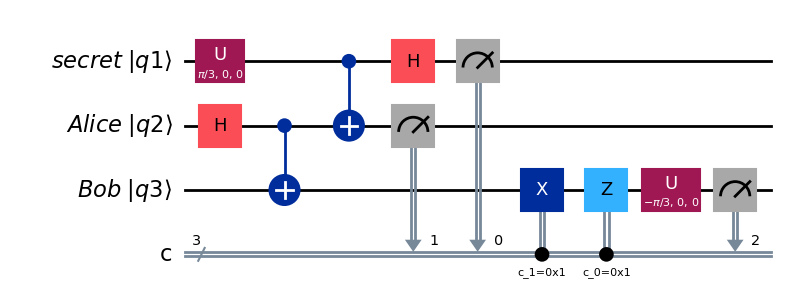

In [ ]:
#3 
from qiskit import *
import numpy as np

# circuit & registers
secret = QuantumRegister(1, "secret |q1⟩")
alice = QuantumRegister(1, "Alice |q2⟩")
bob = QuantumRegister(1, "Bob |q3⟩")

cr = ClassicalRegister(3, "c")

circ3 = QuantumCircuit(secret, alice, bob, cr)

# ---- reproducing the diagram ----

# alice and bob have a qubit state |0⟩

# putting Alice's qubit into superposition |+⟩
circ3.h(alice)
# then entangling it with Bob's qubit by applying a CNOT gate
circ3.cx(alice, bob)

# ==> We now have |EPR⟩ : 2 entangled qubits

#generating a random secret qubit

theta, phi, lambda_ = np.pi/3, 0, 0
circ3.u(theta, phi, lambda_, secret)

# entangling the secret qubit to Alice's
circ3.cx(secret, alice)
# this time we apply the Hadamard gate to the secret qubit AFTER entangling it to Alice because we don't want to alter its state 
circ3.h(secret)

# measuring alice's qubits and storing them in the classical registers
circ3.measure(secret , cr[0])
circ3.measure(alice, cr[1])

# then apply an X gate on Bob's qubit if the second bit from Alice's measurement is 1
# and apply a Z gate if the first bit is 1
circ3.x(bob).c_if(cr[1], 1)
circ3.z(bob).c_if(cr[0], 1)

#this should have recovered the original state of the secret qubit.



# ---------------------------------------------------------------------------------------------------------------------------

# According to "Measurement in an alternative basis" and the official Qiskit Documentation

# We prepared the secret qubit by applying on |q1⟩ = |0⟩ the transformation: U.|0⟩ 
# therefore, at the end, to check if Bob's qubit is also |q3⟩ = U.|0⟩ , we can apply U†.|q3⟩
# We are now "back" in the Z basis, which is the basis `.measure` uses.
# so if p(|q3⟩->|0⟩) = 1 after measurement, the teleportation is successful.

circ3.u(theta, phi, lambda_, bob).inverse() # equivalent to circ3.u(-theta, -phi, -lambda_, bob)`

# We now measure Bob's |q3⟩ qubit
circ3.measure(bob, cr[2])



circ3.draw("mpl")

In [145]:
from qiskit_aer import Aer
from qiskit import transpile

simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circ3, simulator)
job = simulator.run(compiled_circuit, backend=simulator, shots=1024)


result = job.result()
counts = result.get_counts(circ3)



total = sum(counts.values())
prob_0 = sum(v for k, v in counts.items() if k[0] == '0') / total

from IPython.display import display, Math #just trying some libraries
display(Math(f"P(|q_3\\rangle \\rightsquigarrow |0\\rangle) = {prob_0}"))


<IPython.core.display.Math object>

### Conclusion

The qubit was successfully teleported, since we have $P(|q_3\rangle \rightsquigarrow |0\rangle) = 1$ as planned.

# Sources 

<a href="https://youtu.be/jxqnzltpDdE?si=OS-Yu4LZyUYo1GhG"><i>How Quantum Teleportation Really Works</i> - Qiskit</a>

<a href="https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.UGate"><i>Qiskit : UGate</i></a>

<a href="https://en.wikipedia.org/wiki/Quantum_logic_gate"> Section : <i>Unitary inversion of gates</i> - Wikipedia</a>



<a href="https://www.sascha-frank.com/Arrow/latex-arrows.html"><i>LaTeX arrows</i> - Some LaTeX documentation</a>